In [1]:
import cv2
from extract import *
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 15, 6

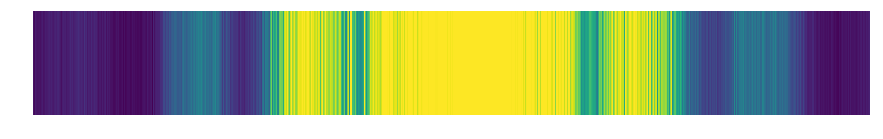

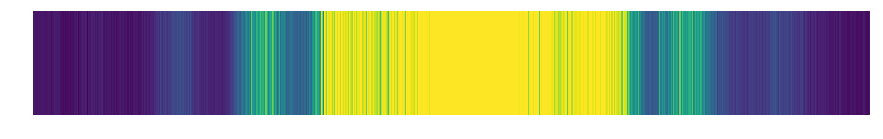

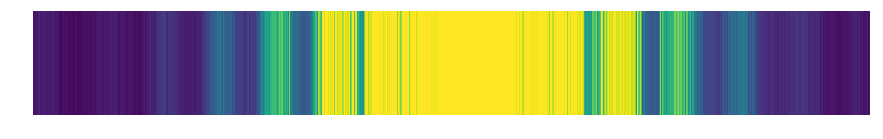

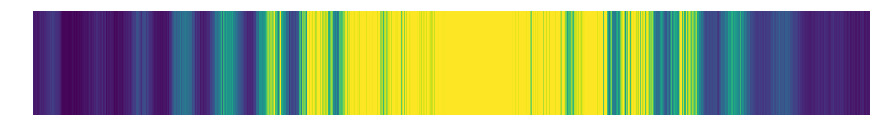

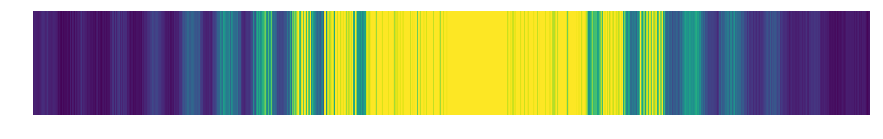

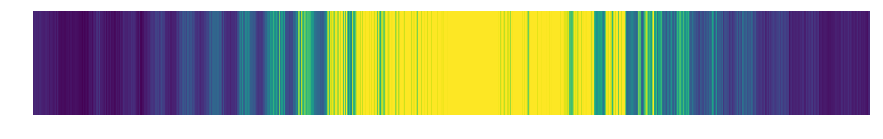

In [3]:
# Wires
for f, (a, b) in zip([38, 50, 76, 100, 120, 150], [(-0.043154761904761904, 203),
                                                   (-0.047371031746031744, 211),
                                                   (-0.05357142857142857, 224),
                                                   (-0.060794044665012405, 264),
                                                   (-0.052083333333333336, 223),
                                                   (-0.060267857142857144, 255),
                                                  ]):
    im = cv2.imread(f"raw-data/wires/{f}.png")
    diffraction = pattern(im, (a, b))
    plt.axis('off')
    plt.imshow(np.array([diffraction] * 500))
    plt.show()

In [4]:
from scipy.signal import argrelextrema, savgol_filter

/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


[ 445  776  992 1282 1556 2692 3271 3478 3811]


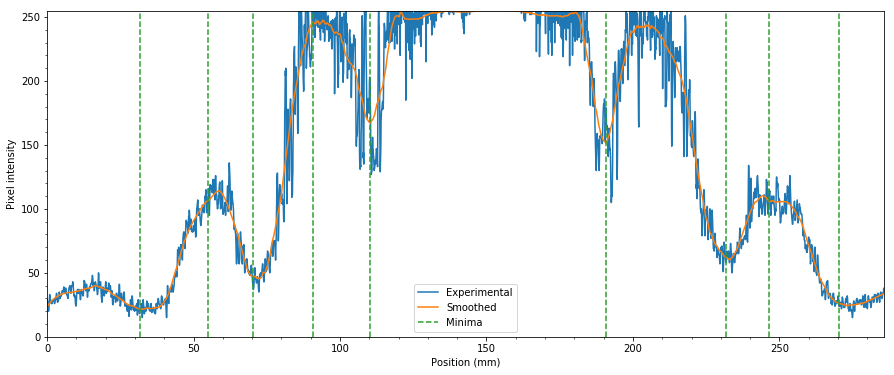

[ 694  858 1054 1255 1473 2232 2952 3391]


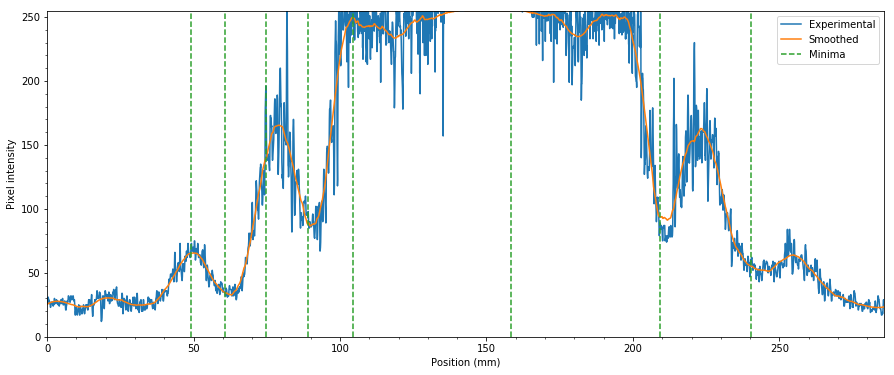

[ 741 1021 1298 1442 2222 2990 3267 3565 3871]


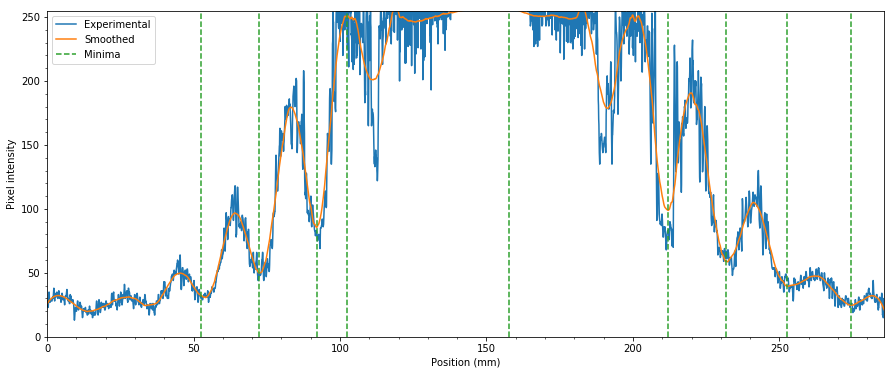

[ 601  810 1035 1243 1453 3035 3276 3505 3756 3989]


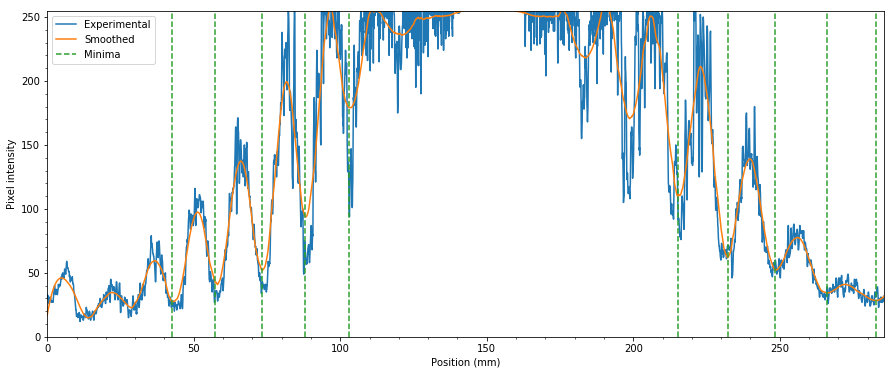

[ 831 1017 1182 1373 1570 2705 2899 3099 3281 3477]


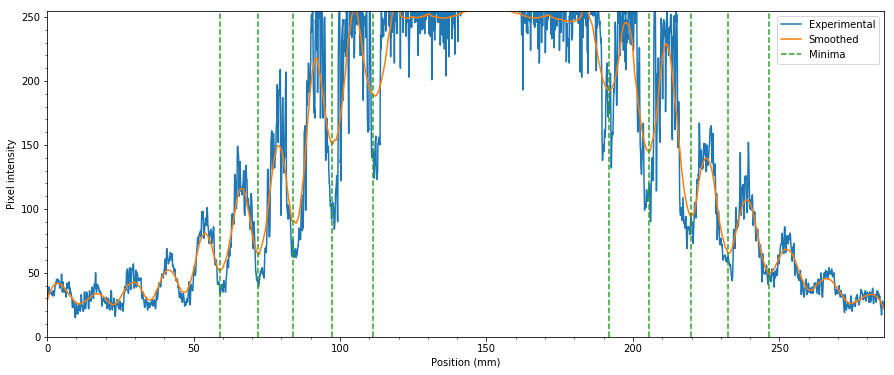

[1378 1521 2906 3840 4003]


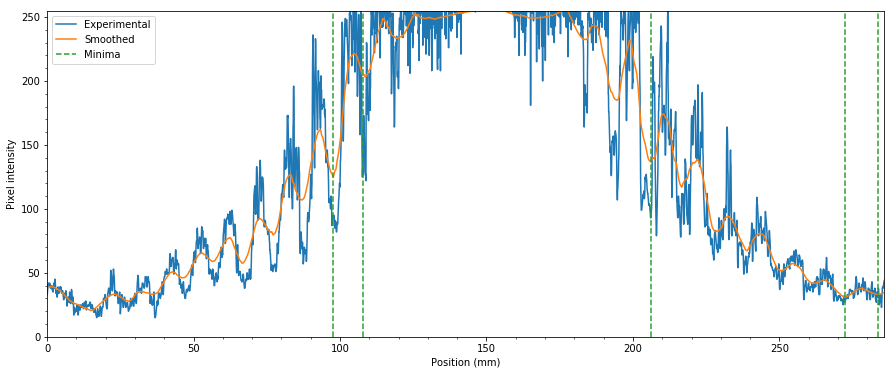

In [5]:
# Wires
for f, (a, b) in zip([38, 50, 76, 100, 120, 150], [(-0.043154761904761904, 203),
                                                   (-0.047371031746031744, 211),
                                                   (-0.05357142857142857, 224),
                                                   (-0.060794044665012405, 264),
                                                   (-0.052083333333333336, 223),
                                                   (-0.060267857142857144, 255),
                                                  ]):
    im = cv2.imread(f"raw-data/wires/{f}.png")
    diffraction = pattern(im, (a, b))
    xs = 0.0709 * np.arange(len(diffraction))
    yhat = savgol_filter(diffraction, 203, 3)
    minima, = argrelextrema(yhat, np.less)
    min_ = minima[1:][np.diff(minima) * 0.0709 > 10]
    print(min_)
    plt.plot(xs, diffraction, label='Experimental')
    plt.plot(xs, yhat, label='Smoothed')

    for m in min_[:-1]:
        plt.axvline(m * 0.0709, color='C2', linestyle='--')
    plt.axvline(min_[-1] * 0.0709, color='C2', linestyle='--', label='Minima')

    
    plt.ylabel("Pixel intensity")
    plt.xlabel("Position (mm)")
    
    plt.xlim(min(xs), max(xs))
    plt.ylim(0, 255)
    
    plt.legend()
    
    plt.minorticks_on()
#     plt.grid()
    if f == 100:
        plt.savefig('processed-data/intensity.png', dpi=160, bbox_inches='tight')
    plt.show()

In [6]:
ds = [
    [(445, 992), (992, 1556), (2692, 3271), (3271, 3811)],
    [(858, 1255), (2952, 3391)],
    [(741, 1021), (1021, 1298), (2990, 3267), (3267, 3565), (3565, 3871)],
    [(601, 810), (810, 1035), (1035, 1243), (1243, 1453), (3035, 3276), (3276, 3505), (3505, 3756), (3756, 3989)],
    [(831, 1017), (1017, 1182), (1182, 1373), (1373, 1570), (2705, 2899), (2899, 3099), (3099, 3281), (3281, 3477)],
    [(1378, 1521), (3840, 4003)],
]

avgs = [sum(map(lambda a: a[1] - a[0], d)) / len(d) * 0.0709 for d in ds]
avgs

[39.52675,
 29.636200000000002,
 20.390840000000004,
 16.005675,
 13.3912375,
 10.847700000000001]

In [7]:
[list(map(lambda a: a[1] - a[0], d)) for d in ds]

[[547, 564, 579, 540],
 [397, 439],
 [280, 277, 277, 298, 306],
 [209, 225, 208, 210, 241, 229, 251, 233],
 [186, 165, 191, 197, 194, 200, 182, 196],
 [143, 163]]

In [8]:
stds = [np.std(np.array(list(map(lambda a: a[1] - a[0], d))) * 0.0709) for d in ds]
stds

[1.075835955199492,
 1.488900000000001,
 0.856218412789634,
 1.056832222670656,
 0.750701356961442,
 0.7090000000000006]

In [9]:
ds = [38, 50, 76, 100, 120, 150]

In [10]:
for d, (av, std) in zip(ds, zip(avgs, stds)):
    print(fr"\num{{ {d} }} & \num{{ {av:.1f} ({std * 10:.0f}) }} \\ \hline")

\num{ 38 } & \num{ 39.5 (11) } \\ \hline
\num{ 50 } & \num{ 29.6 (15) } \\ \hline
\num{ 76 } & \num{ 20.4 (9) } \\ \hline
\num{ 100 } & \num{ 16.0 (11) } \\ \hline
\num{ 120 } & \num{ 13.4 (8) } \\ \hline
\num{ 150 } & \num{ 10.8 (7) } \\ \hline
